# NYC COLLISION 

New York City (NYC), with its bustling streets, diverse modes of transportation, and a population constantly on the move, presents a unique and complex landscape for urban mobility. The analysis of NYC accidents data offers a profound insight into the dynamics of safety within this metropolitan environment. This topic was chosen for its significance in understanding the patterns, trends, and contributing factors behind accidents in one of the world's most iconic cities.


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

### Loading dataset

In [18]:
df = pd.read_csv(r'C:\Users\Shrushti\Desktop\datasets excel\NYC_Collisions.csv')

In [19]:
df.head()

,Collision ID,Date,Time,Borough,Street Name,Cross Street,Latitude,Longitude,Contributing Factor,Vehicle Type,Persons Injured,Persons Killed,Pedestrians Injured,Pedestrians Killed,Cyclists Injured,Cyclists Killed,Motorists Injured,Motorists Killed
0,4491746,1/1/2021,8:00:00 PM,Bronx,Bruckner Expressway,NaN,40.83398,-73.826350,Pavement Slippery,Passenger Vehicle,0.0,0,0,0,0,0,0,0
1,4441905,1/1/2021,5:28:00 AM,Brooklyn,Lafayette Avenue,NaN,40.68730,-73.973656,Unspecified,Passenger Vehicle,0.0,0,0,0,0,0,0,0
2,4382769,1/1/2021,6:00:00 AM,Staten Island,West Shore Expressway,NaN,NaN,NaN,Fell Asleep,Passenger Vehicle,0.0,0,0,0,0,0,0,0
3,4380949,1/1/2021,7:30:00 PM,Bronx,Sedgwick Avenue,Vancortlandt Avenue West,40.88270,-73.892730,NaN,Not Reported,0.0,0,0,0,0,0,0,0
4,4380940,1/1/2021,7:40:00 AM,Brooklyn,Cortelyou Road,Mc Donald Avenue,40.63791,-73.978640,Unspecified,Passenger Vehicle,0.0,0,0,0,0,0,0,0


### Descriptive Statistics

In [20]:
df.describe()

,Collision ID,Latitude,Longitude,Persons Injured,Persons Killed,Pedestrians Injured,Pedestrians Killed,Cyclists Injured,Cyclists Killed,Motorists Injured,Motorists Killed
count,2.384210e+05,216098.000000,216098.000000,238420.000000,238421.000000,238421.000000,238421.000000,238421.000000,238421.000000,238421.00000,238421.000000
mean,4.500533e+06,40.724492,-73.916623,0.487484,0.002663,0.079175,0.001200,0.045852,0.000197,0.34153,0.001124
std,6.887904e+04,0.081815,0.084120,0.806650,0.053535,0.285696,0.034855,0.212723,0.014039,0.77766,0.036041
min,4.073803e+06,40.499710,-74.254960,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,4.440909e+06,40.666386,-73.962950,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,4.500549e+06,40.714690,-73.920610,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,4.560178e+06,40.784048,-73.868616,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
max,4.619988e+06,40.912884,-73.700610,40.000000,3.000000,19.000000,2.000000,3.000000,1.000000,40.00000,3.000000


### Cleaning data




In [21]:
df.isnull().sum()

Collision ID                0
Date                        0
Time                        0
Borough                  7197
Street Name               363
Cross Street           127130
Latitude                22323
Longitude               22323
Contributing Factor      1287
Vehicle Type                0
Persons Injured             1
Persons Killed              0
Pedestrians Injured         0
Pedestrians Killed          0
Cyclists Injured            0
Cyclists Killed             0
Motorists Injured           0
Motorists Killed            0
dtype: int64

In [22]:
df.isnull().sum() / len(df) * 100


Collision ID            0.000000
Date                    0.000000
Time                    0.000000
Borough                 3.018610
Street Name             0.152252
Cross Street           53.321645
Latitude                9.362850
Longitude               9.362850
Contributing Factor     0.539801
Vehicle Type            0.000000
Persons Injured         0.000419
Persons Killed          0.000000
Pedestrians Injured     0.000000
Pedestrians Killed      0.000000
Cyclists Injured        0.000000
Cyclists Killed         0.000000
Motorists Injured       0.000000
Motorists Killed        0.000000
dtype: float64


We observed that the missing values in the columns 'Borough,' 'Street Name,' 'Contributing Factor,' and 'Persons Injured' are low, so we can safely drop these rows. However, the missing values for 'Latitude' and 'Longitude' are both 9.36%, and they are missing together consistently, as indicated by their perfect correlation (1.0). We will perform statistical tests to determine whether these values are missing at random (MAR) or not at random (MNAR).




#### Note: We are performing this statistical analysis just to scrutinize the reason why its missing however it wouldn't be useful for our main analysis. We may eventually drop columns 'Latitude' and 'Longitude' as they do not significantly impact our analysis. 

For 'Cross Street,' which has a high proportion of missing values, we will investigate the reasons behind the missing data to determine if it is missing at random (MAR) or not at random (MNAR). But, before, we will assess whether there is a correlation between the missing values of 'Longitude/Latitude' and 'Cross Street'.

In [35]:

df['Latitude_missing'] = df['Latitude'].isna().astype(int)
df['Cross_Street_missing'] = df['Cross Street'].isna().astype(int)

In [36]:


correlation_1 = df['Latitude_missing'].corr(df['Cross_Street_missing'])


print("Correlation between missing Latitude and missing Cross Street:", correlation_1)




Correlation between missing Latitude and missing Cross Street: 0.009812493106307382


In [38]:

from scipy.stats import chi2_contingency

# Assuming 'df' is your DataFrame with the collision data
# Load your dataset or replace this with your actual data loading step

# Create binary indicators for missing values in Latitude, Longitude, and Cross_Street

df['Longitude_missing'] = df['Longitude'].isna().astype(int)


# Method to test MCAR, MAR, or MNAR
def test_missingness(df, variable):
    # Test MCAR or MAR using chi-square test with Borough as an example
    contingency_table = pd.crosstab(df[f'{variable}_missing'], df['Borough'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-square test for {variable} missingness vs Borough:")
    print(f"Chi-square statistic: {chi2}")
    print(f"p-value: {p}")

    # Print results interpretation
    if p < 0.05:
        print(f"There is significant evidence to reject the null hypothesis.")
    else:
        print(f"There is no significant evidence to reject the null hypothesis.")

# Perform tests for Latitude, Longitude, and Cross_Street missingness
test_missingness(df, 'Latitude')
print("----------------------------------------------")
test_missingness(df, 'Longitude')
print("----------------------------------------------")
test_missingness(df, 'Cross_Street')

Chi-square test for Latitude missingness vs Borough:
Chi-square statistic: 1113.724009708098
p-value: 8.024738583252856e-240
There is significant evidence to reject the null hypothesis.
----------------------------------------------
Chi-square test for Longitude missingness vs Borough:
Chi-square statistic: 1113.724009708098
p-value: 8.024738583252856e-240
There is significant evidence to reject the null hypothesis.
----------------------------------------------
Chi-square test for Cross_Street missingness vs Borough:
Chi-square statistic: 1271.172332434205
p-value: 5.919600995097215e-274
There is significant evidence to reject the null hypothesis.


In [27]:

# Step 1: Create missing indicator columns
df['Latitude_missing'] = df['Latitude'].isnull()
df['Longitude_missing'] = df['Longitude'].isnull()
df['Cross_Street_missing'] = df['Cross Street'].isnull()

# Step 2: Divide time into day and night periods
# Example condition: Consider 'day' if time is between 6:00 AM and 6:00 PM
df['Time'] = pd.to_datetime(df['Time'])
df['Time_period'] = df['Time'].apply(lambda x: 'day' if 6 <= x.hour < 18 else 'night')

# Step 3: Perform t-tests
def perform_t_test(df, variable):
    day_data = df[df['Time_period'] == 'day']
    night_data = df[df['Time_period'] == 'night']
    
    if day_data.empty or night_data.empty:
        print(f"No observations during day or night for {variable}. Cannot perform t-test.")
        return
    
    t_statistic, p_value = stats.ttest_ind(day_data[variable], night_data[variable])
    print(f"T-test results for {variable}:")
    print(f"T-statistic: {t_statistic}")
    print(f"P-value: {p_value}")

# Perform t-tests for each missing indicator column
perform_t_test(df, 'Latitude_missing')
perform_t_test(df, 'Longitude_missing')
perform_t_test(df, 'Cross_Street_missing')

T-test results for Latitude_missing:
T-statistic: 4.625706447355084
P-value: 3.7351947136454184e-06
T-test results for Longitude_missing:
T-statistic: 4.625706447355084
P-value: 3.7351947136454184e-06
T-test results for Cross_Street_missing:
T-statistic: 1.1439453029008377
P-value: 0.25264747002261156


Latitute and longitude:

This indicates that the missingness in the Latitude and Longitude columns is associated with the borough, suggesting that the missingness is not completely at random (MCAR).

Here are a few possible reasons for this missingness:

Data Entry Errors: In certain boroughs, there may be higher rates of data entry errors leading to missing values in these fields.

Geographical Complexity: Some areas might have more complex or ambiguous geographical boundaries, resulting in difficulties accurately recording latitude, longitude, or cross streets.

Reporting Standards: Different boroughs may have varying standards or protocols for reporting collision data, causing inconsistencies in the completeness of the data.

Resource Constraints: Certain boroughs might have limited resources for data collection and reporting, leading to higher instances of missing data in these variables.

Regarding timings, there is a significant difference in the proportion of missing values for latitude between day and night periods. Specifically, there are more missing latitude values during one of these periods, suggesting a potential pattern related to the time of day.

Cross Street

There is an indication that it is associated with the borough, suggesting that the missingness is not at random (MNAR). This association implies that there are systematic reasons behind why 'Cross Street' data is missing, rather than it occurring randomly.

Possible Reasons for Missingness:
Data Collection Practices: Different boroughs may have varying protocols or resources for collecting cross street information, leading to inconsistencies in reporting.

Reporting Requirements: Some collisions may occur in areas where specifying cross streets is less mandatory or required, resulting in more frequent missing data.

Geographical Complexity: Certain boroughs or areas within them might have more complex street layouts, making it harder to accurately record cross street data.

There is no significant difference in the proportion of missing values for cross street between day and night periods. The p-value (0.25) suggests that any observed difference is likely due to random chance rather than a systematic pattern related to the time of day.


Imputing missing values in the 'Cross Street' column can be challenging due to the lack of sufficient information for imputation. Given the complexity and potential inaccuracies that could arise from speculative imputation methods, it is prudent to label these missing values as "Not Specified."

In [39]:
df.dropna(subset=['Borough', 'Street Name', 'Contributing Factor', 'Persons Injured'], how='any', inplace=True)
df.drop(columns=['Latitude', 'Longitude'], inplace=True)
df['Cross Street'].fillna('Not Specified', inplace = True)

In [40]:
df.isnull().sum()

Collision ID            0
Date                    0
Time                    0
Borough                 0
Street Name             0
Cross Street            0
Contributing Factor     0
Vehicle Type            0
Persons Injured         0
Persons Killed          0
Pedestrians Injured     0
Pedestrians Killed      0
Cyclists Injured        0
Cyclists Killed         0
Motorists Injured       0
Motorists Killed        0
Latitude_missing        0
Cross_Street_missing    0
Longitude_missing       0
Time_period             0
dtype: int64

### Analysis Based on Time

In [9]:
#Illustrate the occurrences and frequency of accidents at various times of the day across different boroughs

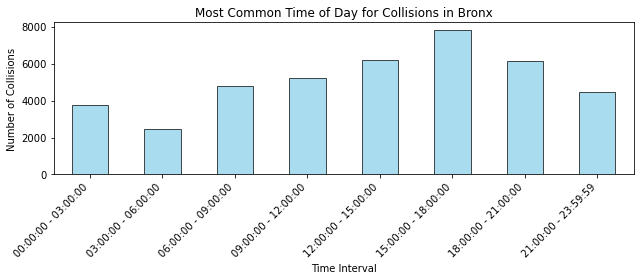

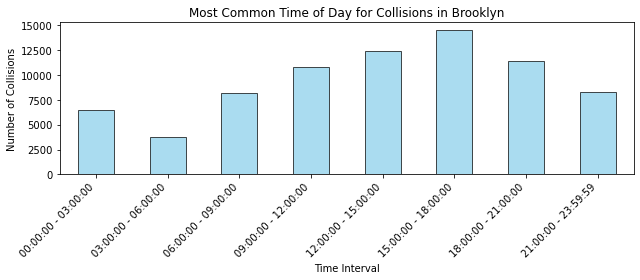

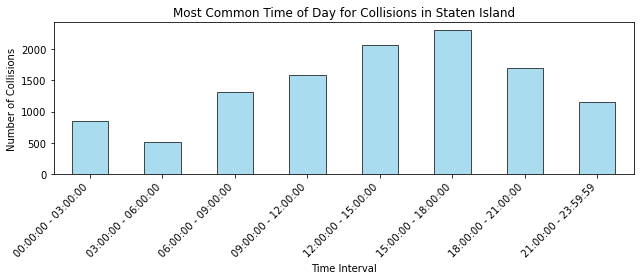

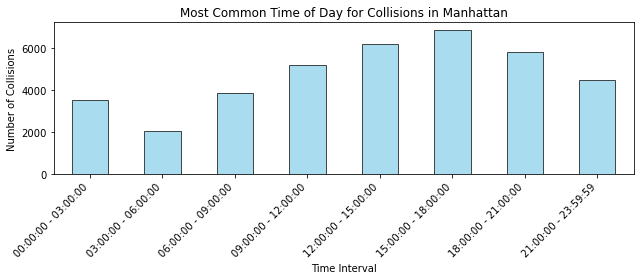

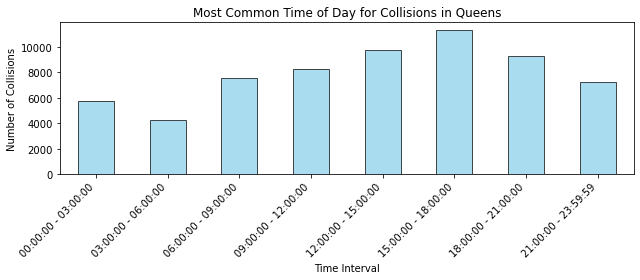

In [10]:
from datetime import datetime

df['Time'] = pd.to_datetime(df['Time'], format='%I:%M:%S %p')

# Define a custom function to categorize time intervals
def categorize_time_interval(time):
    if time < datetime.strptime('03:00:00', '%H:%M:%S').time():
        return '00:00:00 - 03:00:00'
    elif time < datetime.strptime('06:00:00', '%H:%M:%S').time():
        return '03:00:00 - 06:00:00'
    elif time < datetime.strptime('09:00:00', '%H:%M:%S').time():
        return '06:00:00 - 09:00:00'
    elif time < datetime.strptime('12:00:00', '%H:%M:%S').time():
        return '09:00:00 - 12:00:00'
    elif time < datetime.strptime('15:00:00', '%H:%M:%S').time():
        return '12:00:00 - 15:00:00'
    elif time < datetime.strptime('18:00:00', '%H:%M:%S').time():
        return '15:00:00 - 18:00:00'
    elif time < datetime.strptime('21:00:00', '%H:%M:%S').time():
        return '18:00:00 - 21:00:00'
    else:
        return '21:00:00 - 23:59:59'

# Create a new column 'Time Interval' and assign each time to the respective interval
df['Time Interval'] = df['Time'].dt.time.apply(categorize_time_interval)


# Plotting bar charts for each borough and time interval
boroughs = df['Borough'].unique()

for borough in boroughs:
    borough_data = df[df['Borough'] == borough]
    
    
    plt.figure(figsize=(9, 4))
    borough_data.groupby('Time Interval').size().plot(kind='bar', color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(f'Most Common Time of Day for Collisions in {borough}')
    plt.xlabel('Time Interval')
    plt.ylabel('Number of Collisions')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    
# Save the plot as an image file
plt.savefig(f'{borough}_collisions_time_of_day.png')
    
plt.tight_layout()
plt.show()

This analysis delves into the accident dynamics across New York City boroughs, exploring the timing and frequency of incidents throughout the day to unveil patterns and improve urban safety. Notably, Brooklyn consistently records a higher overall number of accidents compared to other boroughs. The observed trend across all boroughs reveals a common pattern – minimal accidents before 6 am, a gradual increase leading to a peak between 3 pm and 6 pm, followed by a gradual decline. This understanding offers valuable insights for crafting strategies to enhance safety during peak hours across the diverse boroughs of the city.


In [11]:
#Analysis of Monthly Accident Trends Across Boroughs: How Does the Frequency of Accidents Vary Throughout the Year
#in Different Boroughs?

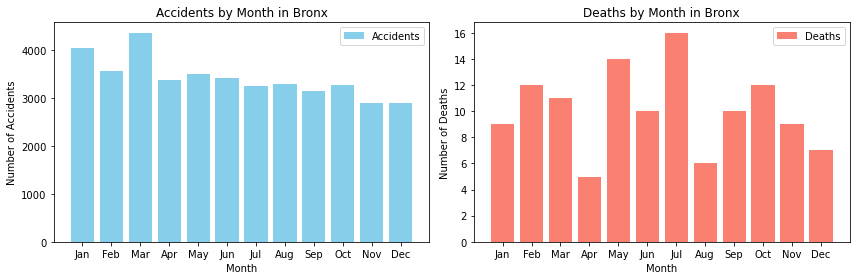

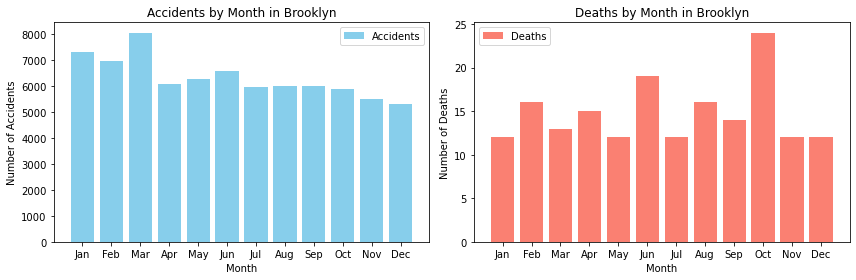

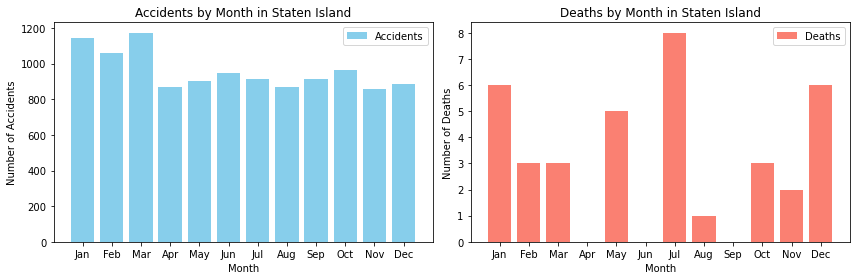

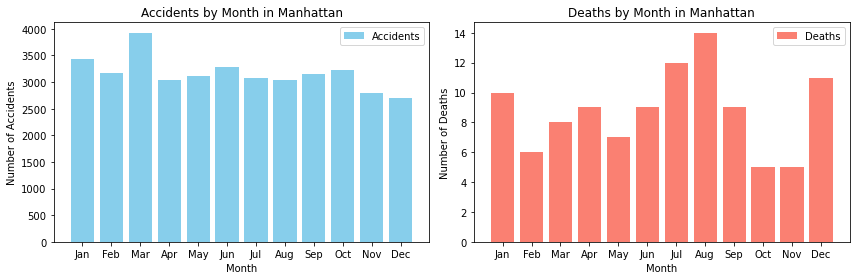

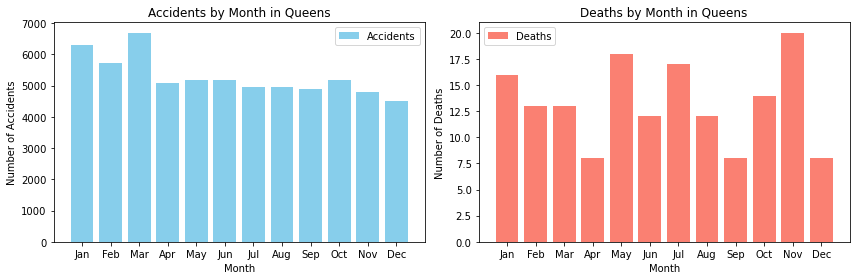

In [12]:
import calendar

df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Create new columns for month and year
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Group by borough and month, count the number of accidents and sum the deaths
borough_monthly_data = df.groupby(['Borough', 'Month']).agg({'Collision ID': 'count', 'Persons Killed': 'sum'}).reset_index()

# Plotting bar charts for accidents and deaths by borough and month
boroughs = df['Borough'].unique()

for borough in boroughs:
    borough_data = borough_monthly_data[borough_monthly_data['Borough'] == borough]
    
    plt.figure(figsize=(12, 4))
    
    # Plotting accidents
    plt.subplot(1, 2, 1)
    plt.bar(borough_data['Month'], borough_data['Collision ID'], color='skyblue', label='Accidents')
    plt.title(f'Accidents by Month in {borough}')
    plt.xlabel('Month')
    plt.ylabel('Number of Accidents')
    plt.xticks(range(1, 13), calendar.month_abbr[1:])
    plt.legend()
    
    # Plotting deaths
    plt.subplot(1, 2, 2)
    plt.bar(borough_data['Month'], borough_data['Persons Killed'], color='salmon', label='Deaths')
    plt.title(f'Deaths by Month in {borough}')
    plt.xlabel('Month')
    plt.ylabel('Number of Deaths')
    plt.xticks(range(1, 13), calendar.month_abbr[1:])
    plt.legend()
    
    plt.tight_layout()
    plt.show()

The collision patterns exhibit consistency across all boroughs, with the initial three months recording a high number of accidents followed by a sudden decrease. This is because, January and February are attributed to heavy snowfall. However, December, also experiencing snow, surprisingly reports fewer accidents. In terms of fatalities, each borough demonstrates distinct dynamics. When comparing the ratio of deaths to accidents, it is significantly low, indicating that despite accidents, fatalities are comparatively rare occurrences across the boroughs.


### Analysis based on location

In [13]:
#Identifying High-Risk Locations: Unveiling the Top 3 Ranks for Locations within Each Borough with the Highest Collision Counts

In [14]:
top_locations = df.groupby(['Borough', 'Street Name']).size().reset_index(name='Collision Count')
top_locations = top_locations.sort_values(by=['Borough', 'Collision Count'], ascending=[True, False])
top_locations['Rank'] = top_locations.groupby('Borough').cumcount() + 1

# Get top 3 locations for each borough
top3_locations = top_locations[top_locations['Rank'] <= 3]

from tabulate import tabulate
table_data = top3_locations.loc[:, ['Rank', 'Borough', 'Street Name', 'Collision Count']]
table_format = tabulate(table_data, headers='keys', tablefmt='fancy_grid')
print(table_format)

╒══════╤════════╤═══════════════╤════════════════════════════╤═══════════════════╕
│      │   Rank │ Borough       │ Street Name                │   Collision Count │
╞══════╪════════╪═══════════════╪════════════════════════════╪═══════════════════╡
│  655 │      1 │ Bronx         │ Major Deegan Expressway    │              1296 │
├──────┼────────┼───────────────┼────────────────────────────┼───────────────────┤
│  120 │      2 │ Bronx         │ Bruckner Boulevard         │              1280 │
├──────┼────────┼───────────────┼────────────────────────────┼───────────────────┤
│  211 │      3 │ Bronx         │ Cross Bronx Expy           │              1144 │
├──────┼────────┼───────────────┼────────────────────────────┼───────────────────┤
│ 1408 │      1 │ Brooklyn      │ Belt Parkway               │              2295 │
├──────┼────────┼───────────────┼────────────────────────────┼───────────────────┤
│ 1315 │      2 │ Brooklyn      │ Atlantic Avenue            │              1899 │
├───

### Analysis based on contribution factor

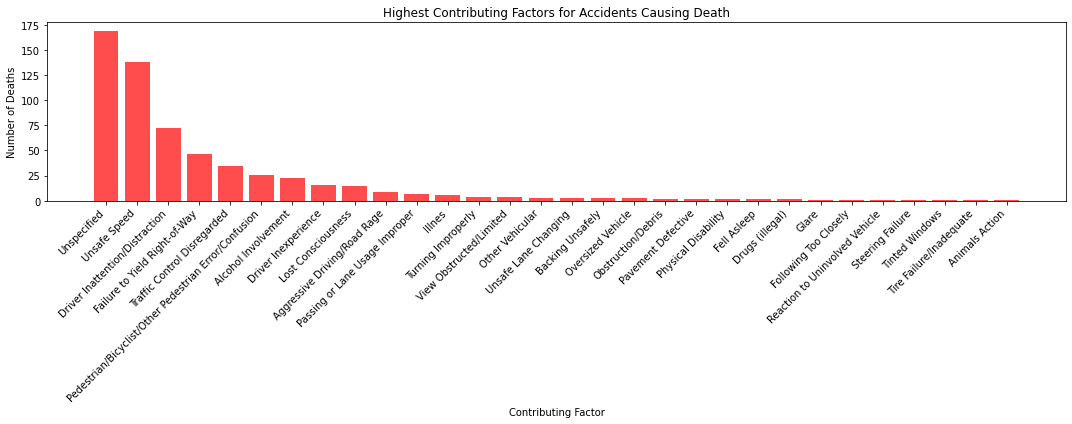

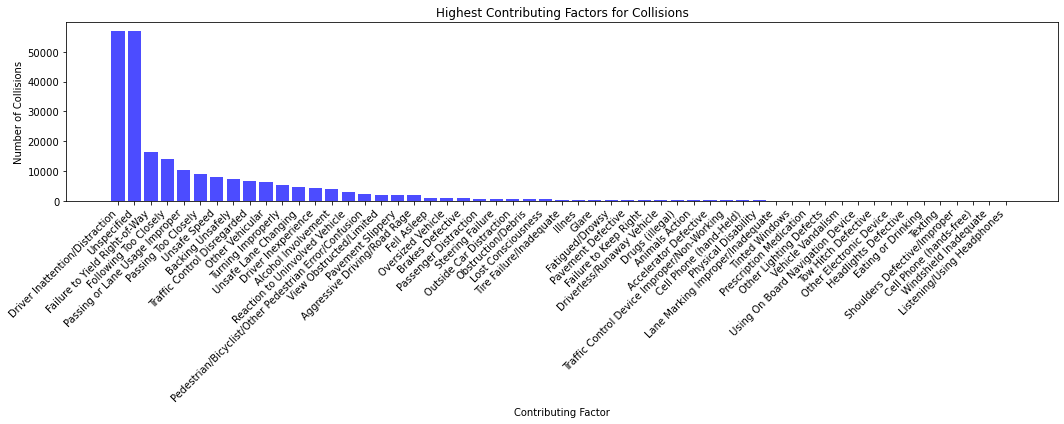

In [17]:
death_data = df[df['Persons Killed'] > 0]

# Group by contributing factors and sum the number of deaths
death_factors = death_data.groupby('Contributing Factor')['Persons Killed'].sum().reset_index()

death_factors = death_factors.sort_values(by='Persons Killed', ascending=False)

# Plot the bar chart
plt.figure(figsize=(15, 6))
plt.bar(death_factors['Contributing Factor'], death_factors['Persons Killed'], color='red', alpha=0.7)
plt.title('Highest Contributing Factors for Accidents Causing Death')
plt.xlabel('Contributing Factor')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

collision_factors = df['Contributing Factor'].value_counts().reset_index()
collision_factors.columns = ['Contributing Factor', 'Number of Collisions']

collision_factors = collision_factors.sort_values(by='Number of Collisions', ascending=False)

# Plot the bar chart
plt.figure(figsize=(15, 6))
plt.bar(collision_factors['Contributing Factor'], collision_factors['Number of Collisions'], color='blue', alpha=0.7)
plt.title('Highest Contributing Factors for Collisions')
plt.xlabel('Contributing Factor')
plt.ylabel('Number of Collisions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

It appears that a significant number of collisions stem from driver inattention; surprisingly, the fatality rate associated with this cause is relatively low. Collisions attributed to speeding, while moderate in frequency, exhibit a notably high fatality rate. Interestingly, issues like following too closely and failure to yield the right of way result in many collisions after instances of driver inattention.

In [18]:

#In manhattan, for vehicle type bus, motorcycle and passenger vehicle which contribustion factors affect most

C:\Users\Shrushti\AppData\Local\Temp\ipykernel_12796\2840941621.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')  # Tilt x-axis labels


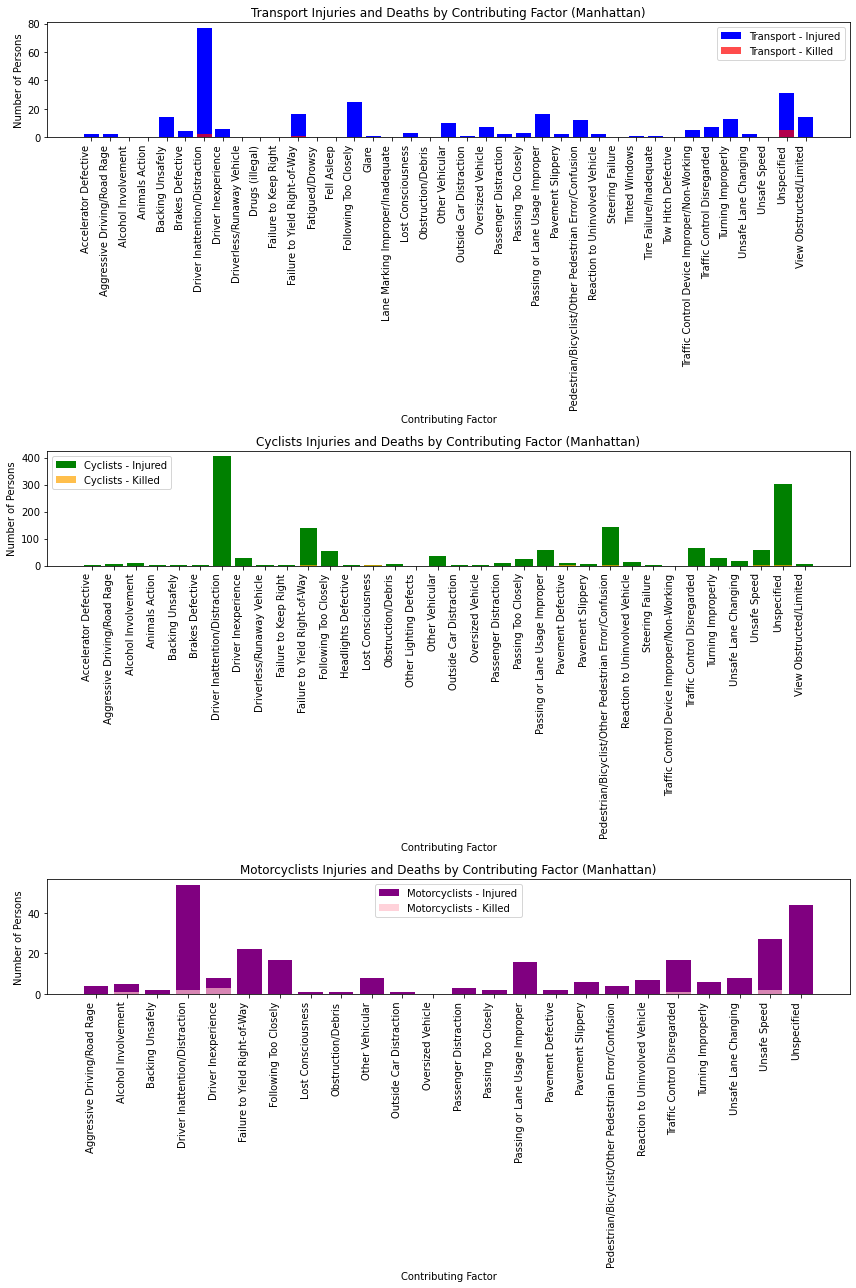

In [19]:
# Assuming 'Contributing Factor', 'Persons Injured', 'Persons Killed', 'Vehicle Type' are column names in your DataFrame
manhattan_data = df[df['Borough'] == 'Manhattan']

# Filter data for pedestrians, motorcyclists, and cyclists
Transport_data = manhattan_data[manhattan_data['Vehicle Type'] == 'Transport']
motorcyclist_data = manhattan_data[manhattan_data['Vehicle Type'] == 'Motorcycle']
cyclist_data = manhattan_data[manhattan_data['Vehicle Type'] == 'Bicycle']

# Group by contributing factors and sum injuries and deaths
Transport_factors = Transport_data.groupby('Contributing Factor')[['Persons Injured', 'Persons Killed']].sum().reset_index()
motorcyclist_factors = motorcyclist_data.groupby('Contributing Factor')[['Persons Injured', 'Persons Killed']].sum().reset_index()
cyclist_factors = cyclist_data.groupby('Contributing Factor')[['Persons Injured', 'Persons Killed']].sum().reset_index()

# Create separate bar charts for each group
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# Plot for Transport
axs[0].bar(Transport_factors['Contributing Factor'], Transport_factors['Persons Injured'], color='blue', label='Transport - Injured')
axs[0].bar(Transport_factors['Contributing Factor'], Transport_factors['Persons Killed'], color='red', label='Transport - Killed', alpha=0.7)
axs[0].set_title('Transport Injuries and Deaths by Contributing Factor (Manhattan)')
axs[0].set_xlabel('Contributing Factor')
axs[0].set_ylabel('Number of Persons')

axs[0].legend()

# Plot for Cyclists
axs[1].bar(cyclist_factors['Contributing Factor'], cyclist_factors['Persons Injured'], color='green', label='Cyclists - Injured')
axs[1].bar(cyclist_factors['Contributing Factor'], cyclist_factors['Persons Killed'], color='orange', label='Cyclists - Killed', alpha=0.7)
axs[1].set_title('Cyclists Injuries and Deaths by Contributing Factor (Manhattan)')
axs[1].set_xlabel('Contributing Factor')
axs[1].set_ylabel('Number of Persons')
axs[1].legend()

# Plot for Motorcyclists
axs[2].bar(motorcyclist_factors['Contributing Factor'], motorcyclist_factors['Persons Injured'], color='purple', label='Motorcyclists - Injured')
axs[2].bar(motorcyclist_factors['Contributing Factor'], motorcyclist_factors['Persons Killed'], color='pink', label='Motorcyclists - Killed', alpha=0.7)
axs[2].set_title('Motorcyclists Injuries and Deaths by Contributing Factor (Manhattan)')
axs[2].set_xlabel('Contributing Factor')
axs[2].set_ylabel('Number of Persons')
axs[2].legend()

plt.tight_layout()
for ax in axs:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')  # Tilt x-axis labels
    
# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In Manhattan, there's a notable disparity in injury rates, with cyclists facing a significantly higher risk of injuries compared to those using other modes of transportation like public transport or motorcycles.



In [20]:
#Top 5 contributing factors for fatal accidents accross each borough

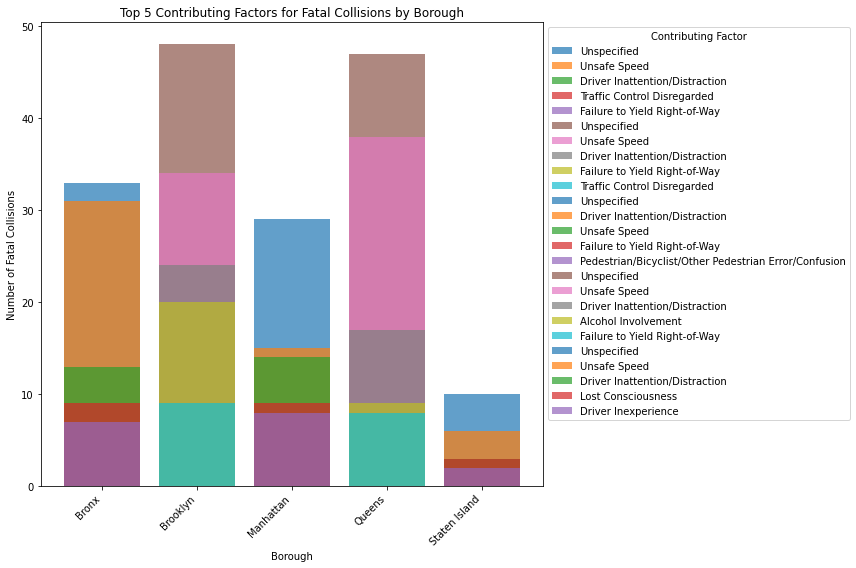

In [22]:
fig, ax = plt.subplots(figsize=(12, 8))

for index, row in top_factors_by_borough.iterrows():
    ax.bar(row['Borough'], row['Number of Fatal Collisions'], label=row['Contributing Factor'], alpha=0.7)

ax.set_title('Top 5 Contributing Factors for Fatal Collisions by Borough')
ax.set_xlabel('Borough')
ax.set_ylabel('Number of Fatal Collisions')
ax.legend(title='Contributing Factor', bbox_to_anchor=(1, 1), loc='upper left')

# Set custom tick positions and labels for all boroughs
boroughs = top_factors_by_borough['Borough'].unique()
ax.set_xticks(range(len(boroughs)))
ax.set_xticklabels(boroughs, rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [23]:
 #the top contributing factor for fatal collisions in each borough

C:\Users\Shrushti\AppData\Local\Temp\ipykernel_12796\3218376029.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  top_factors_by_borough = borough_contributions.groupby('Borough')['Number of Fatal Collisions', 'Contributing Factor'].max().reset_index()
C:\Users\Shrushti\AppData\Local\Temp\ipykernel_12796\3218376029.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_factors_by_borough['Borough'], rotation=45, ha='right')


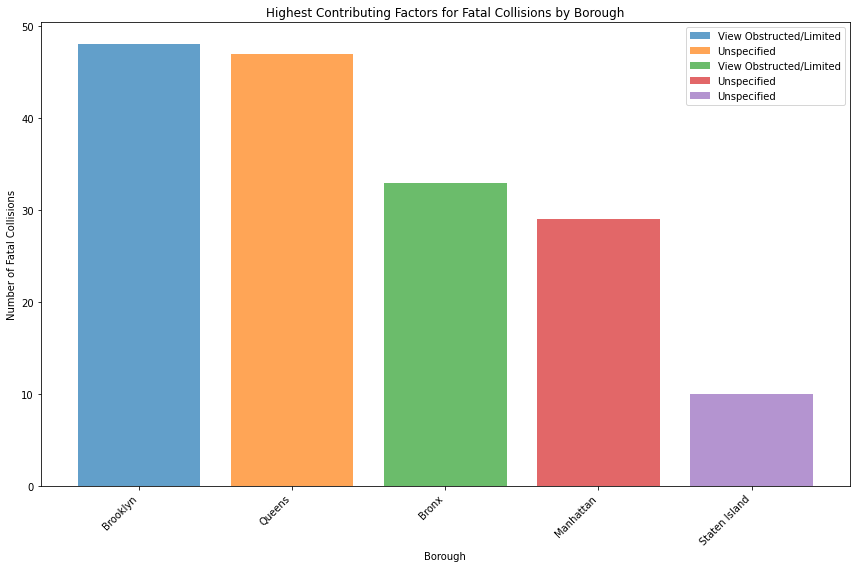

In [24]:
fatal_collisions = df[df['Persons Killed'] > 0]

# Group by borough and contributing factor, and count the occurrences
borough_contributions = fatal_collisions.groupby(['Borough', 'Contributing Factor']).size().reset_index(name='Number of Fatal Collisions')

# Find the most common contributing factor for each borough
top_factors_by_borough = borough_contributions.groupby('Borough')['Number of Fatal Collisions', 'Contributing Factor'].max().reset_index()

# Sort the data by the number of fatal collisions in descending order
top_factors_by_borough = top_factors_by_borough.sort_values(by='Number of Fatal Collisions', ascending=False)

# Create a grouped bar chart
fig, ax = plt.subplots(figsize=(12, 8))

# Iterate through the rows of the DataFrame to plot bars
for index, row in top_factors_by_borough.iterrows():
    ax.bar(row['Borough'], row['Number of Fatal Collisions'], label=row['Contributing Factor'], alpha=0.7)

# Add labels, title, legend, and adjust layout
ax.set_title('Highest Contributing Factors for Fatal Collisions by Borough')
ax.set_xlabel('Borough')
ax.set_ylabel('Number of Fatal Collisions')
ax.legend()
ax.set_xticklabels(top_factors_by_borough['Borough'], rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [25]:
#distribution of collision accross borough

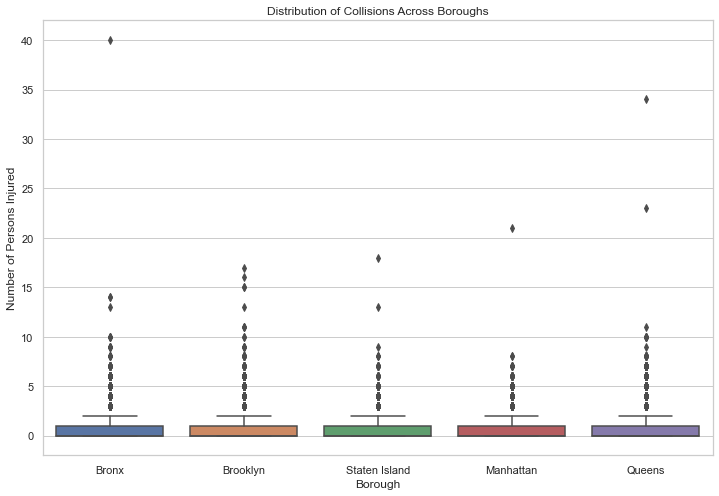

In [26]:

sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# Create a boxplot to visualize the distribution of collisions across boroughs
sns.boxplot(x='Borough', y='Persons Injured', data=df)
plt.title('Distribution of Collisions Across Boroughs')
plt.xlabel('Borough')
plt.ylabel('Number of Persons Injured')
plt.show()
